# Homework 3 Group O
Florian Ulbricht 485080

Martin Hahn 484109 

Mattis Rosenkranz 487615

David Andrés Mancera Carrillo 487621


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sps

### 1 Square Wave Synthesis

#### a)

The following code is explicitly written for the given exercise assuming that

- N is an even number

- $ \Delta f = f_s / N = f_0 = 100 $

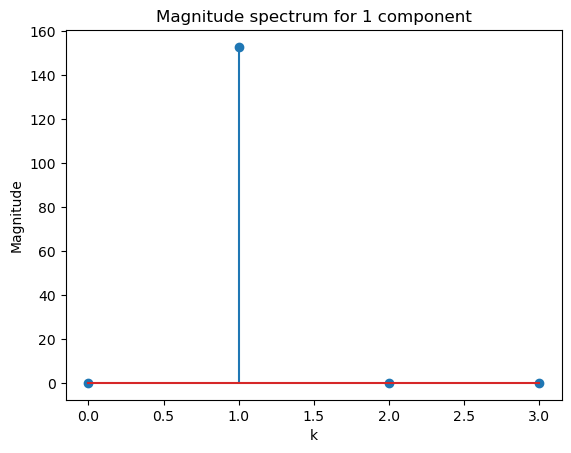

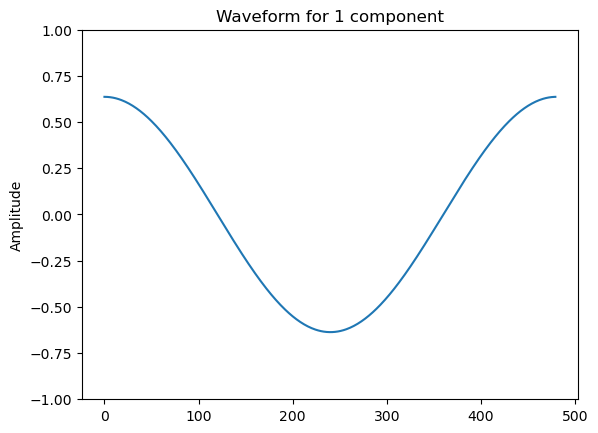

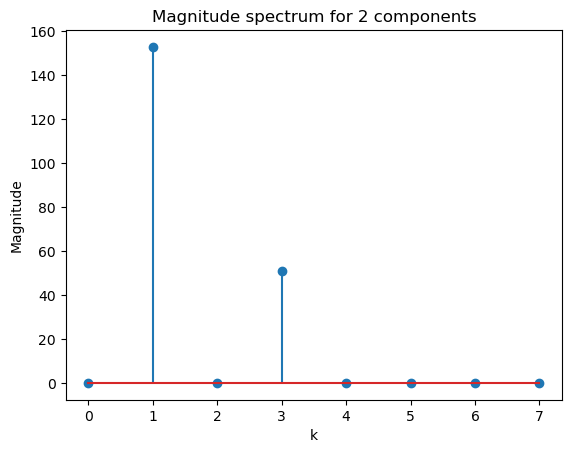

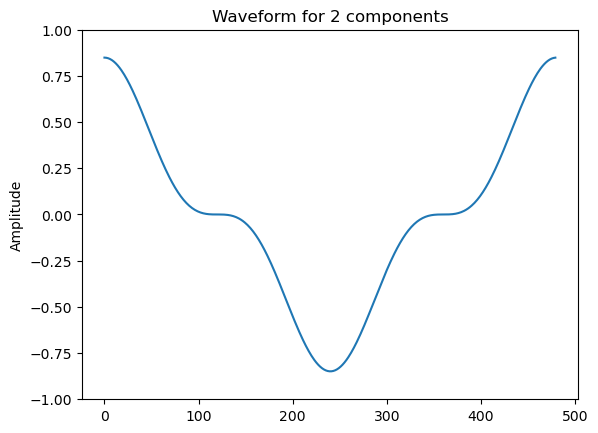

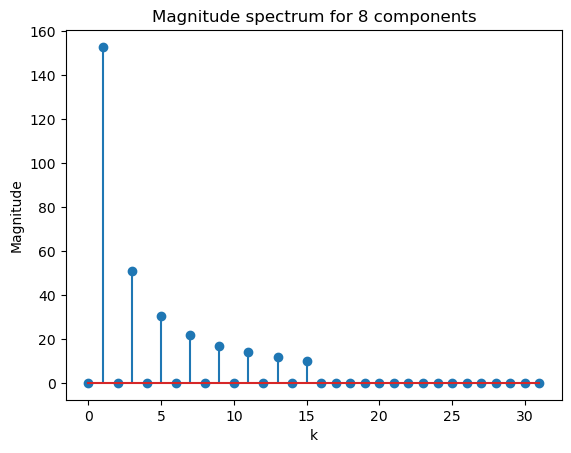

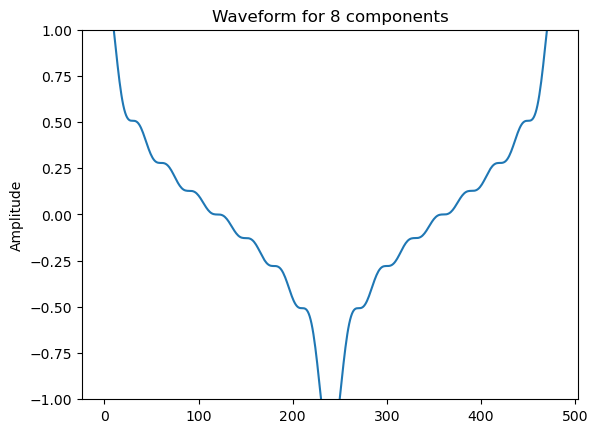

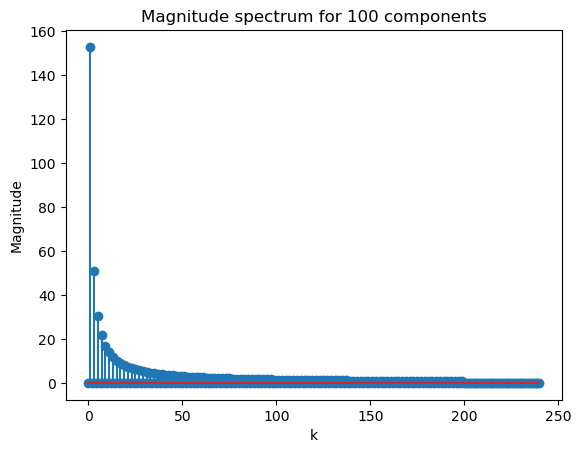

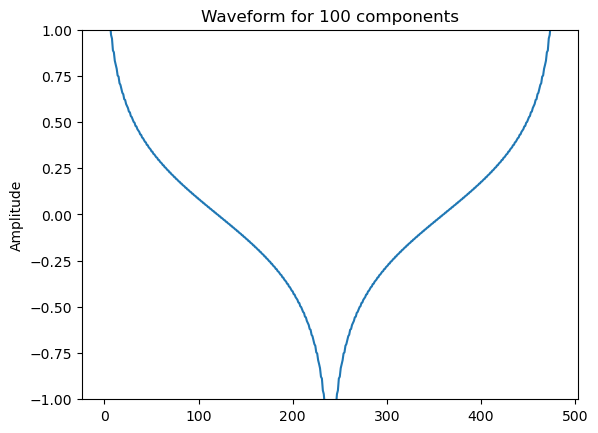

In [24]:
fs = 48_000
f0 = 100
N = 480
N_single_sided = N // 2 + 1
component_amounts = [1, 2, 8, 100]

faktor_1sekunde = fs // N


def plot_spectrum_magnitude(X, title):
    figure, axes = plt.subplots()
    axes.set_title(title)
    axes.stem(np.abs(X))
    axes.set_xlabel('k')
    axes.set_ylabel('Magnitude')


def plot_waveform(x, title):
    figure, axes = plt.subplots()
    axes.set_title(title)
    axes.plot(x)
    axes.set_ylabel('Amplitude')
    axes.set_ylim([-1, 1])


for component_amount in component_amounts:
    X_single_sided = np.zeros(N_single_sided, dtype=complex)

    k_to_fill = np.ones(component_amount, dtype=int) + np.arange(0, component_amount) * 2

    for k in k_to_fill:
        X_single_sided[k] = N / np.pi / k

    X = np.append(X_single_sided, np.flip(X_single_sided[1:-1]))
    x = np.real(np.fft.ifft(X))

    title_suffix = f'for {component_amount} component{"s" if component_amount > 1 else ""}'
    plot_spectrum_magnitude(X_single_sided[:component_amount * 4], f'Magnitude spectrum {title_suffix}')
    plot_waveform(x, f'Waveform {title_suffix}')

    ### 1c) make signals 1 second long
    x_1sekunde = np.tile(x, faktor_1sekunde)
    name = f"square wave one second {component_amount} sinus components.wav"
    sf.write(name, x_1sekunde, fs)



#### 4 Effect of Time Windows on the Spectrum

Generate a 2 second sine signal with a frequency of 2 kHz and a sampling rate of 16 kHz.
Use a rectangular, triangular and Hann window (scipy.signal.windows) and apply the
windows with two different length (20 periods and 20.25 periods) to the 2 kHz sine signal.
Plot the windows (time signals) and the logarithmic magnitude spectra of the six
windowed sine signals and explain the results.

Hint: multiply the spectra X[k] by 2 / numpy.sum(window) to get comparable results.

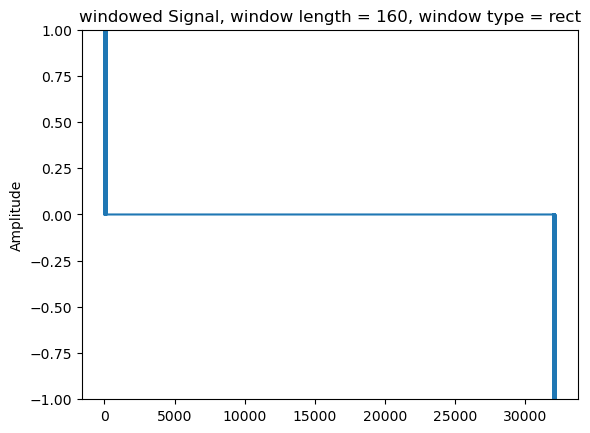

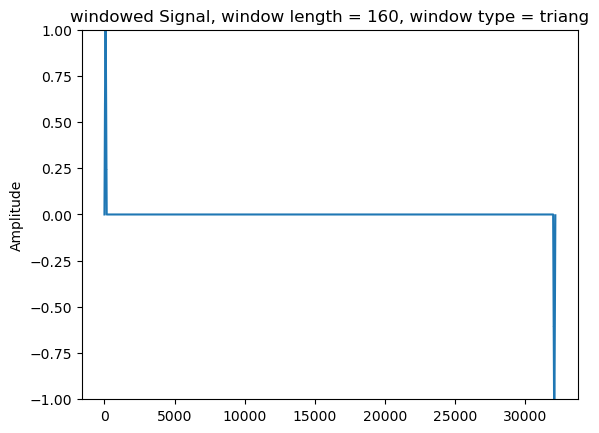

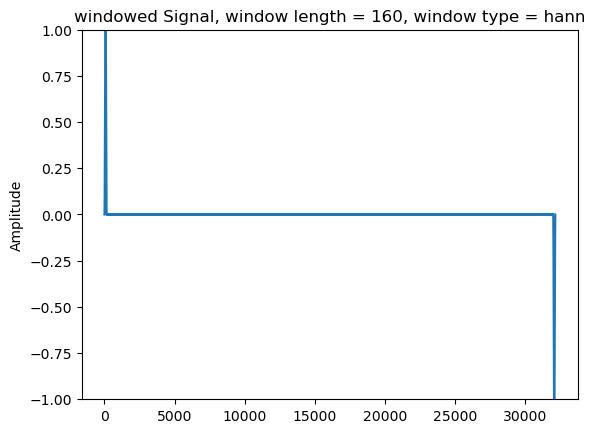

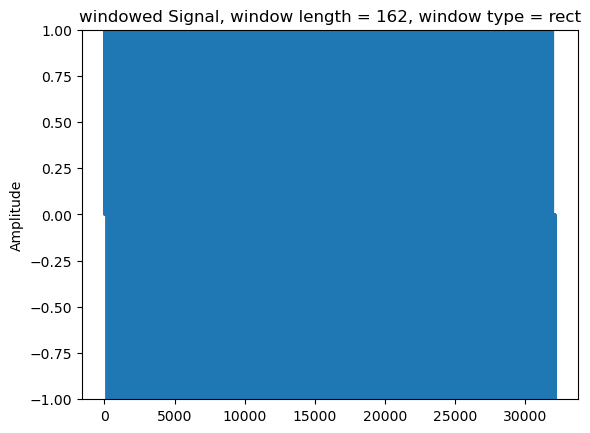

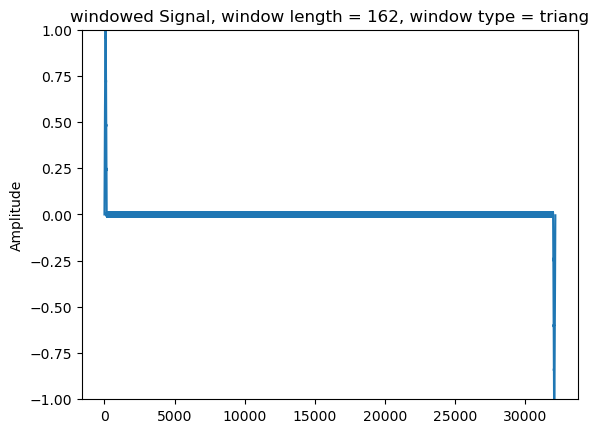

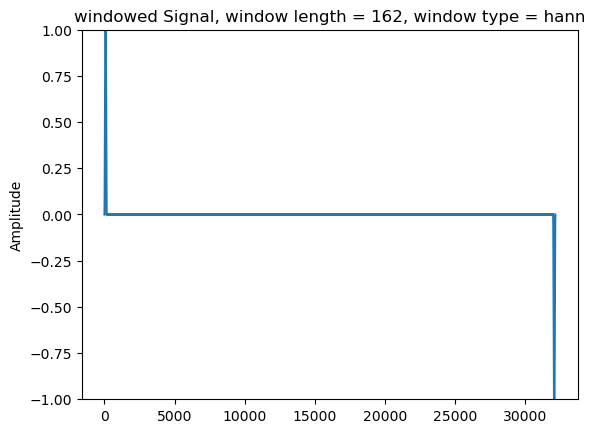

In [55]:
f = 2_000
fs = 16_000
t_seconds = 2
t_samples = fs * t_seconds
periods = [20, 20.25]

# determine window lengths
window_length_samples = [0, 0]
for id, period in enumerate(periods):
    window_length_samples[id] = int(period / f * fs)

# helper function
def generate_sin(N, f, fs):
    w0 = 2 * np.pi * f / fs
    n = np.arange(N)
    return np.sin(w0 * n)

x = generate_sin(t_samples, f, fs)

for window_length_samples in window_length_samples:

    rectangular_window = sps.windows.boxcar(window_length_samples)
    triangular_window = sps.windows.triang(window_length_samples)
    hann_window = sps.windows.hann(window_length_samples)
    
    windows = [rectangular_window, triangular_window, hann_window]
    window_names = ['rect', 'triang', 'hann']
    
    for window, window_names in zip(windows, window_names):
        x_windowed = np.convolve(x, window)
        title = f'windowed Signal, window length = {window_length_samples}, window type = {window_names}'
        plot_waveform(x_windowed, title)



